In [1]:
import numpy as np
import itertools
import pygsti
import pickle
from matplotlib import pyplot as plt
#probably want some plotting stuff
from matplotlib import colormaps as cmaps
#quail

In [2]:
pauli_sampling = 'all-paulis'
spam = 'perfect-spam'
#rs = [0.001, 0.01, 0.05, 0.1]
idxs = list(range(1,80))
unmeas_widths = [4,6]
meas_widths = [1,2]
exp = 'semi_dense' #'depol'
#rs = [0.1, 1, 10]

4 1
6 1
8 1


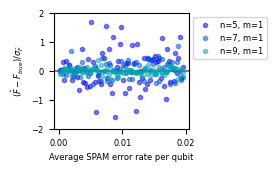

In [32]:
plt.figure(figsize=(1.75,1.5))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [1]
i = 0
param_list= np.arange(0.0001, 0.0201, 0.00025)

for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f*(1-0.5*(1-f))**2)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])

            except:
                pass

        plt.errorbar(param_list[:len(fs_true)], (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n={nrest+nmeas}, m={nmeas}', alpha=0.5)
        
        i+=1
        
plt.axhline(0, color='gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
plt.legend(fontsize=6, bbox_to_anchor=(1,1))
plt.ylabel(r'''$(\hat{F}-F_{true})/\sigma_{\hat{F}}$''', fontsize=6)
plt.xlabel('Average SPAM error rate per qubit', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/spam_rel_error_less.pdf')
plt.ylim(-2,2)
plt.show()

4 2
6 2
8 2


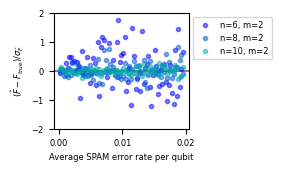

In [31]:
plt.figure(figsize=(1.75,1.5))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [2]
i = 0
param_list= np.arange(0.0001, 0.0201, 0.00025)

for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f*(1-0.5*(1-f))**2)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])

            except:
                pass

        plt.errorbar(param_list[:len(fs_true)], (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n={nrest+nmeas}, m={nmeas}', alpha=0.5)
        
        i+=1
        
plt.axhline(0, color='gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
plt.legend(fontsize=6, bbox_to_anchor=(1,1))
plt.ylabel(r'''$(\hat{F}-F_{true})/\sigma_{\hat{F}}$''', fontsize=6)
plt.xlabel('Average SPAM error rate per qubit', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/spam_rel_error_more.pdf')
plt.ylim(-2,2)
plt.show()

4 1
6 1
8 1


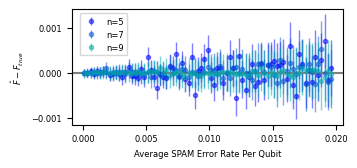

In [14]:
plt.figure(figsize=(3.5,1.5))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [1]
i = 0
param_list= np.arange(0.0001, 0.0201, 0.00025)

for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f*(1-0.5*(1-f))**2)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])

            except:
                pass

        plt.errorbar(param_list[:len(fs_true)], (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n={nrest+nmeas}', alpha=0.5)
        
        i+=1
        
plt.axhline(0, color='gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
plt.legend(bbox_to_anchor=(0.22,1), fontsize=6)
plt.ylabel(r'''$\hat{F}-F_{true}$''', fontsize=6)
plt.xlabel('Average SPAM Error Rate Per Qubit', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/spam_abs_error_less_q.pdf')
#plt.ylim(-1.5,1.5)
plt.show()

4 2
6 2
8 2


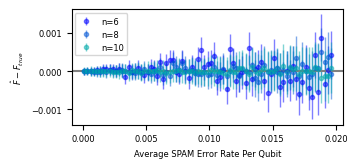

In [13]:
plt.figure(figsize=(3.5,1.5))
colors = [cmaps['winter'](j/3) for j in range(3)]
num_unmeas = [4,6,8]
num_meas = [2]
i = 0
param_list= np.arange(0.0001, 0.0201, 0.00025)

for nmeas in num_meas:
    for nrest in num_unmeas:
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f*(1-0.5*(1-f))**2)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])

            except:
                pass

        plt.errorbar(param_list[:len(fs_true)], (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n={nrest+nmeas}', alpha=0.5)
        
        i+=1
        
plt.axhline(0, color='gray')
#plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
plt.legend(bbox_to_anchor=(0.22,1), fontsize=6)
plt.ylabel(r'''$\hat{F}-F_{true}$''', fontsize=6)
plt.xlabel('Average SPAM Error Rate Per Qubit', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig(f'plots/spam_abs_error_more_q.pdf')
#plt.ylim(-1.5,1.5)
plt.show()

4 1


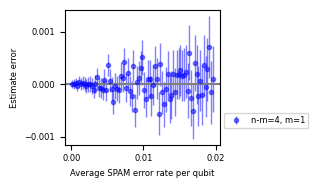

6 1


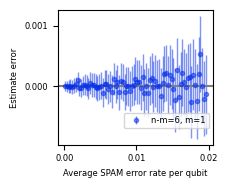

8 1


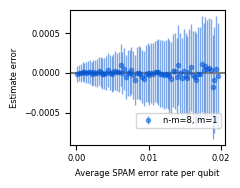

4 2


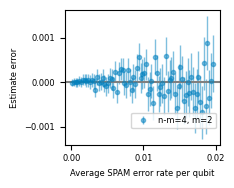

6 2


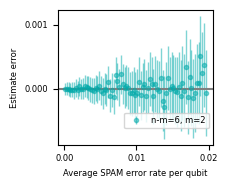

8 2


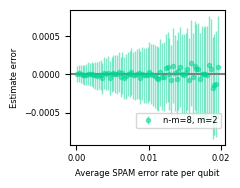

In [5]:

colors = [cmaps['winter'](j/6) for j in range(6)]
num_unmeas = [4,6,8]
num_meas = [1,2]
i = 0
param_list= np.arange(0.0001, 0.0201, 0.00025)

for nmeas in num_meas:
    for nrest in num_unmeas:
        plt.figure(figsize=(2,1.75))
        print(nrest, nmeas)
        fs_est = []
        fs_true = []
        fs_std = []

        for idx in idxs:
            try:
                if nrest <= 2:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_full_estimate.pkl'
                else:
                    fname = f'results/stim/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_alt.pkl'
                with open(fname, 'rb') as f:
                    result_dict = pickle.load(f)
                f = result_dict['fidelity']
                fs_true.append(f*(1-0.5*(1-f))**2)
                fs_est.append(result_dict['fidelity_est'])
                fs_std.append(result_dict['fidelity_std'])

            except:
                pass

        plt.errorbar(param_list[:len(fs_true)], (np.array(fs_est)-np.array(fs_true)), yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=colors[i], label=f'n-m={nrest}, m={nmeas}', alpha=0.5)
        
        i+=1
        
        plt.axhline(0, color='gray')
        #plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
        plt.legend(bbox_to_anchor=(1,0.27), fontsize=6)
        plt.ylabel('Estimate error', fontsize=6)
        plt.xlabel('Average SPAM error rate per qubit', fontsize=6)
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.savefig(f'plots/spam_abs_error_{nmeas}_{nrest}.pdf')
        #plt.ylim(-1.5,1.5)
        plt.show()

In [17]:
with open(f'results/stim/sweep_spam/1_4_qubit_mcmcb_run_19_depol.pkl', 'rb') as f:
    result_dict = pickle.load(f)

In [18]:
np.std(list(result_dict['evals_by_p'].values()))

0.010984283173760013

In [20]:
np.mean(result_dict['stds'])

0.00031926388991915944

In [54]:
#why are there so many points significantly above 0? In these simulations, we're sampling all of the Paulis.

In [77]:
pauli_sampling = 'all-paulis'
spam = 'imperfect-spam'
spam_ps = [0, 0.005, 0.01, 0.02]
idxs = list(range(0,0))
num_unmeas = 1
num_meas = 1

In [84]:
cdict = {0: 'blue', 0.005:'green', 0.01:'yellow', 0.02:'orange'}

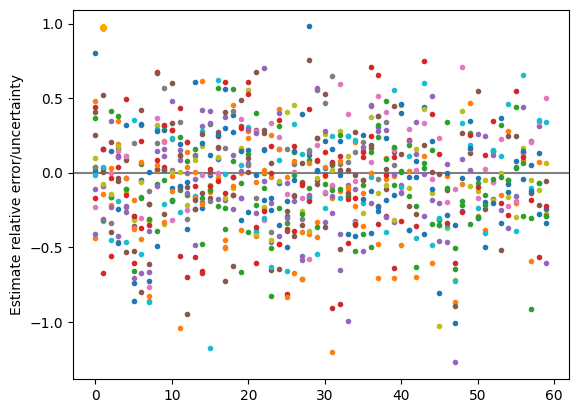

In [90]:
#result_dict = {'T':T, 'probs':probs, 'inst':usc, 'fidelity':fidelity, 'fidelity_est':fidelity_est, 
#               'fidelity_std':fidelity_std, 'evals_by_p':evals_by_p, 'tvals_by_p':tvals_by_p, 'r':r,'noise_strength_mcms':noise_strength_mcms}

for p1, p2 in itertools.product(spam_ps, repeat=2):
    fs_est = []
    fs_true = []
    fs_std = []

    for idx in idxs:
        try:
            with open(f'results/{pauli_sampling}-{spam}/prep_{p1}_meas_{p2}/{num_unmeas}_{num_meas}_qubit_mcmcb_run_{idx}', 'rb') as f:
                result_dict = pickle.load(f)

            fs_true.append(result_dict['fidelity'])
            fs_est.append(result_dict['fidelity_est'])
            fs_std.append(result_dict['fidelity_std'])
        except:
            pass
        #fidelity_points.append((fidelity, fidelity_est, fidelity_std))
        
    plt.errorbar(fs_true, fs_est, yerr=fs_std, marker='.', linewidth=0, elinewidth=1, color=cdict[p1])
    
#     line_pts = np.linspace(0.9,1,100)
#     plt.plot(line_pts, line_pts, color = 'gray')
#     plt.xlim(np.min(fs_true),np.max(fs_true))
#     plt.ylim(np.min(fs_true),np.max(fs_true))
#     plt.ylabel('Estimated instrument fidelity')
#     plt.xlabel('True instrument fidelity')
#     plt.savefig(f'plots/spam_{r}_true_vs_est_1_1_q.png')
#     plt.show()
    
    plt.errorbar(range(len(fs_est)), (np.array(fs_est)-np.array(fs_true))/fs_std, marker='.', linewidth=0, elinewidth=1)
    
    #plt.axhline(np.mean((np.array(fs_est)-np.array(fs_true))/fs_std), color='purple',linestyle='--')
    plt.ylabel('Estimate relative error/uncertainty')
    #plt.xlabel('True instrument infidelity')
plt.axhline(0, color='gray')
plt.savefig(f'plots/spam_{r}_rel_error_1_1_q.png')
#plt.xlim(0.026,0.027)
plt.show()


In [61]:
#should probably make histograms
with open(f'results/stim/1_2_qubit_mcmcb_run_90.pkl', 'rb') as f:
    result_dict = pickle.load(f)

In [80]:
np.std(list(result_dict['evals_by_p'].values()))

0.03151979443805534

In [ ]:
#try different types of models
#vary relative error of unmeas system and meas system
#vary how the error rates are randomly sampled